___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Bruno Morales Balkins

#### Daniel do Carmo Granja de Castro

#### Omar Dibo Calixto Afrange Neto
___

# Qual a chance de um estudante entrar em uma faculdade baseado em diversos parametros relacionados a notas em exames e qualidade da faculdade.

___

## A. INTRODUÇÃO

Nossa base de dados contem informações sobre alguns candidatos de universidades variadas. As variáveis incluem notas em alguns testes, experiência com pesquisa, carta de recomendação e outros quesitos necessários, além disso ela traz a probabilidade dele ser aceito na universidade desejada. O intuito deste projeto é prever a probabilidade do aluno conseguir passar na universidade a partir de modelos de regressão e comparar com o valor real de probabilidade.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [41]:
print('Esperamos trabalhar no diretório')
print("documents/github/projeto3dpdados/")

Esperamos trabalhar no diretório
documents/github/projeto3dpdados/


### BASE DE DADOS

In [42]:
dados = pd.read_csv('Admission_Predict.csv')
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Serial No.: Número de série do aluno

GRE Scores: Nota do aluno no teste GRE

TOEFL Scores: Nota do aluno no teste TOEFL

University Rating: Classificação do nível de ensino da universidade desejada

Statment of purpose (SOP): Qualidade do texto sobre o objeto de pesquisa do aluno

Letter of recomendation (LOR): Qualidade da carta de recomendação do aluno

Undergraduate Grade Point Average (CGPA): Média acadêmica do aluno

Research: Experiência com pesquisa. 1- Sim, 2- Não

Change of Admission: Probabilidade de admissão do aluno

In [43]:
dados = dados.drop("Serial No.",axis=1)

### ANÁLISE DESCRITIVA

**Variáveis Quantitativas**

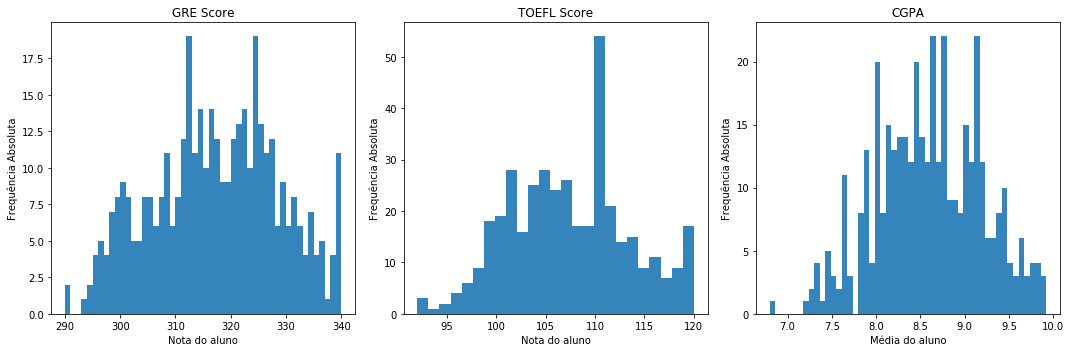

In [44]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dados["GRE Score"].plot.hist(bins=50,title='GRE Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(132)
plot = dados["TOEFL Score"].plot.hist(bins=25,title='TOEFL Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(133)
plot = dados["CGPA"].plot.hist(bins=50,title='CGPA', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média do aluno')

plt.tight_layout()
plt.show()

Text(0.5,0,'Nota do aluno')

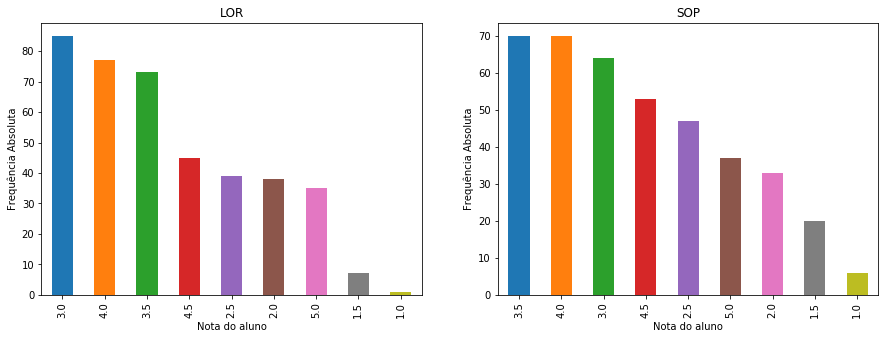

In [45]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQuantitativa2 = dados["LOR "].value_counts()
plot = adQuantitativa2.plot(kind='bar', legend=False,title="LOR");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(122)
adQuantitativa3 = dados["SOP"].value_counts()
plot = adQuantitativa3.plot(kind='bar', legend=False,title="SOP");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

**Variável Qualitativa**

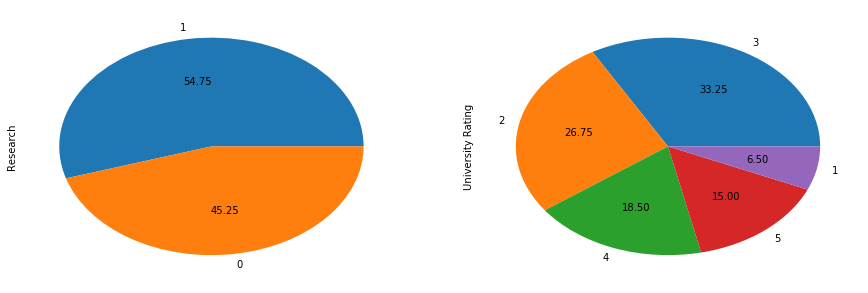

In [46]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQualitativa = dados['Research'].value_counts()
adQualitativa.plot(kind='pie', autopct="%0.2f",legend=False);

plt.subplot(122)
adQuantitativa = dados['University Rating'].value_counts()
adQuantitativa.plot(kind='pie', autopct="%0.2f",legend=False);

In [47]:
dados

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


Após a análise univariada vamos estudar como elas se correlacionam. Utilzaremos uma matriz de cores para entender a influência de cada uma delas.

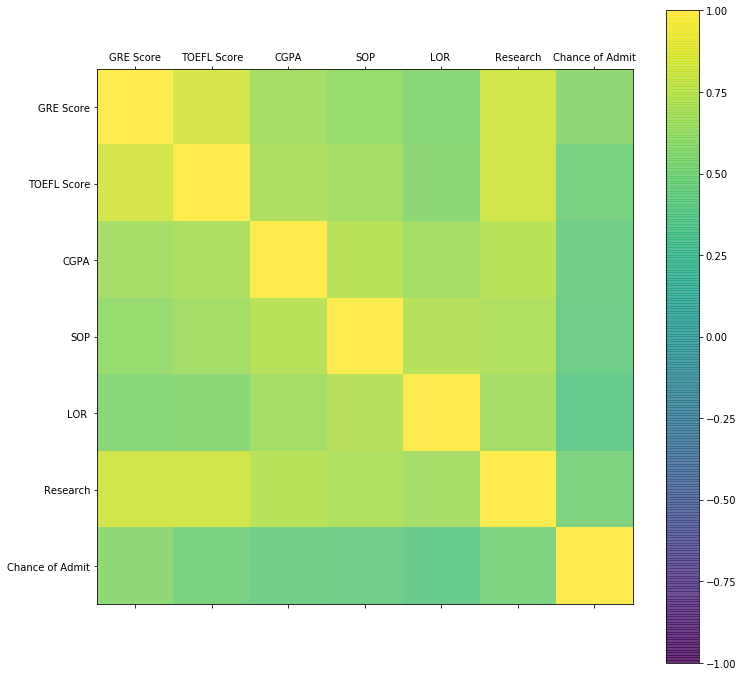

In [48]:
correl = dados.iloc[:,:7].corr()
correl
names = ['GRE Score','TOEFL Score','CGPA','SOP','LOR ','Research','Chance of Admit']
d = len(names)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correl, interpolation='none', vmin=-1, vmax=1 ,alpha=0.8)
fig.colorbar(cax)
ticks = np.arange(0,d,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

___
## C. MODELOS DE PREDIÇÃO

In [85]:
trainingSet, testSet = train_test_split(dados, test_size = 0.25)
testSet.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
214,331,117,4,4.5,5.0,9.42,1,0.94
261,312,104,3,3.5,4.0,8.09,0,0.71
107,338,117,4,3.5,4.5,9.46,1,0.91
165,322,110,5,4.5,4.0,8.97,0,0.78
177,319,110,3,3.5,3.5,9.04,0,0.82


o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [86]:
admissao = trainingSet['Chance of Admit ']
mu = admissao.mean()

admissao2 = testSet['Chance of Admit ']
mu2 = admissao2.mean()


In [146]:
mu, mu2


(0.7211, 0.7340999999999999)

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [51]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [158]:
df = trainingSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research','Chance of Admit ']]

In [123]:
Y = df['Chance of Admit ']

In [159]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research']]

In [160]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 28 May 2019   Prob (F-statistic):          3.25e-100
Time:                        14:34:51   Log-Likelihood:                 403.68
No. Observations:                 300   AIC:                            -791.4
Df Residuals:                     292   BIC:                            -761.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2644      0.149     -8.506      0.000      -1.557      -0.972
GRE Score             0.0020      0.001      2.882      0.004       0.001       0.003
TOEFL Score           0.0023      0.001      1.756      0.080      -0.000       0.005
University Rating     0.0066      0.005      1.223      0.222      -0.004       0.017
SOP                  -0.0014      0.006     -0.220      0.826      -0.014       0.011
LOR                   0.0218      0.006      3.385      0.001       0.009       0.035
CGPA                  0.1159      0.014      8.114      0.000       0.088       0.144
Research              0.0270      0.009      2.916      0.004       0.009       0.045
==============================================================================
Omnibus:                       74.184   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.088
Skew:                          -1.245   Prob(JB):                     1.28e-34
Kurtosis:                       5.507   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
valor_previsao_treinamento = -1.4346 + trainingSet['GRE Score']*0.0026 + trainingSet['TOEFL Score']*0.0022 + trainingSet['University Rating']*0.0077 - trainingSet['SOP']*0.0003 + trainingSet['LOR ']*0.022 + trainingSet['CGPA']*0.1166 + trainingSet['Research']*0.027

valor_previsao_teste = -1.4346 + testSet['GRE Score']*0.0026 + testSet['TOEFL Score']*0.0022 + testSet['University Rating']*0.0077 - testSet['SOP']*0.0003 + testSet['LOR ']*0.022 + testSet['CGPA']*0.1166 + testSet['Research']*0.027

In [175]:
valor_previsao_treinamento, valor_previsao_teste

(160    0.578726
 96     0.594300
 225    0.558748
 371    0.839902
 63     0.718100
 56     0.562740
 206    0.602524
 309    0.706710
 240    0.525638
 213    0.996348
 108    0.948908
 72     0.920070
 114    0.705320
 320    0.739800
 301    0.734466
 45     0.857660
 104    0.829680
 359    0.667304
 316    0.537826
 337    0.966402
 343    0.624608
 242    0.797266
 110    0.688368
 54     0.676600
 157    0.630516
 38     0.501100
 146    0.681668
 205    0.522840
 46     0.930280
 66     0.806332
          ...   
 112    0.681894
 339    0.805406
 235    0.885568
 28     0.427620
 192    0.847954
 167    0.656382
 260    0.858758
 117    0.503236
 174    0.834702
 357    0.615124
 150    0.928738
 156    0.665344
 55     0.610020
 360    0.810924
 4      0.646486
 356    0.815032
 228    0.748422
 109    0.714824
 119    0.816744
 18     0.748180
 208    0.623556
 288    0.801632
 26     0.782630
 103    0.708052
 133    0.811648
 159    0.529990
 164    0.860016
 209    0.6606

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

Media

In [126]:
adm = (admissao - mu)**2
   
adm2 = (admissao2 - mu)**2



In [127]:
x = adm.mean()
y = adm2.mean()

In [128]:
rmstreino = x**0.5
rmsteste = y**0.5

In [129]:
rmstreino, rmsteste


(0.143247303639545, 0.1401042112143671)

REGRESSAO LINEAR

In [149]:
admregressao = (admissao - valor_previsao_treinamento)**2

admregressao2 = (admissao2-valor_previsao_teste)**2

In [153]:
x2 = admregressao.mean()
y2 = admregressao2.mean()

In [154]:
rmstreino2 = x2**0.5
rmsteste2 = y2**0.5

In [152]:
rmstreino2, rmsteste2

0.06397825056657926

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS